Bernat Sort Rufat

MD004_Advanced data analysis and visualization tools

Máster en Data Science

# Trabajo del Tema 3: Hypothesis Test

## Caso de uso

Una empresa de ecommerce B2B se plantea utilizar una funcionalidad para su web que le permite hacer una recomendación de producto a sus usuarios con el objetivo de aumentar el valor medio de las ventas. 

De cara a validar que este sistema de recomendación tiene un efecto positivo nuestra empresa decide plantear un Test de Hipótesis y testear el servicio durante 3 meses antes de decidir si lo deben adoptar o no en base al posible efecto incremental en las ventas. 

El datastet incluye los datos finales del test y contiene tres columnas:
1. La primera es el identificador de la venta
2. La segunda es el valor de la venta
3. La tercera es la clase:
    - 1 para las ventas en las que el sistema de recomendación ha participado
    - 0 en las que el sistema de recomendació no ha participado

Para alcanzar el objetivo de validar si este sistema de recomendación tiene un efecto positivo en la empresa, seguiremos los siguientes pasos:
- Visualización y comprensión del dataset: exploración básica inicial de los datos
- Distribución de los datos: distribución de las ventas según la clase
    - ¿tenemos la misma distribución de ventas?
- Test de Hipótesis. Validar la hipótesis que la clase 1 tiene un valor de venta medio más alta: 
    - En el caso que la hipótesis sea válida, ¿Qué incremento neto de ventas se produce mediante el sitema de recomendación?
    - En el caso que se confirme que la hipótesis no es válida, ¿Qué factores influyen en que no lo sea?
- ¿Se podría recomendar el uso de este sistema de recomendación?
    - Justificación
    - ¿Qué factores se deberían tomar en cuenta para la toma de la decisión?


### Carga de packages

In [7]:
library(ggplot2)

install.packages("plotly")
library(plotly)

library(dplyr)

install.packages('nortest')
library(nortest)

library(tidyverse)

install.packages("ggthemes")                   
library("ggthemes")                             

install.packages("modeest")
library(modeest)

### Carga de datos

In [162]:
sales_test_df <- read.csv(file='b2b_ecommerce_sales_data.csv', header=TRUE, sep=',', dec='.')

### Exploración básica inicial de los datos

In [163]:
# las 6 primeras filas del df
head(sales_test_df)

Reference Order.Value Group
1 570554    0.38        1    
2 567869    0.40        0    
3 539441    0.42        0    
4 542736    0.55        0    
5 573589    0.55        0    
6 540833    0.65        1

In [161]:
# dimensión del df (filas y columnas)
dim(sales_test_df)

[1] 11786     3

In [148]:
# estructura interna compacta del df
str(sales_test_df)

'data.frame':	11786 obs. of  3 variables:
 $ Reference  : int  570554 567869 539441 542736 573589 540833 560217 542136 549534 540945 ...
 $ Order.Value: num  0.38 0.4 0.42 0.55 0.55 0.65 0.79 0.84 0.84 0.85 ...
 $ Group      : int  1 0 0 0 0 1 1 1 1 0 ...


In [149]:
# visión general del df
summary(sales_test_df)

   Reference       Order.Value          Group       
 Min.   :536365   Min.   :   0.38   Min.   :0.0000  
 1st Qu.:547564   1st Qu.: 528.66   1st Qu.:0.0000  
 Median :558626   Median :2376.76   Median :1.0000  
 Mean   :558883   Mean   :3104.26   Mean   :0.5332  
 3rd Qu.:570289   3rd Qu.:5244.93   3rd Qu.:1.0000  
 Max.   :581587   Max.   :9476.80   Max.   :1.0000  

### Distribución de los datos: distribución de las ventas según la clase

In [164]:
# convertimos la columna Group (la clase) de int a factor (de numérica a categórica)
sales_test_df$Group <- as.factor(sales_test_df$Group)

#### Histograma 

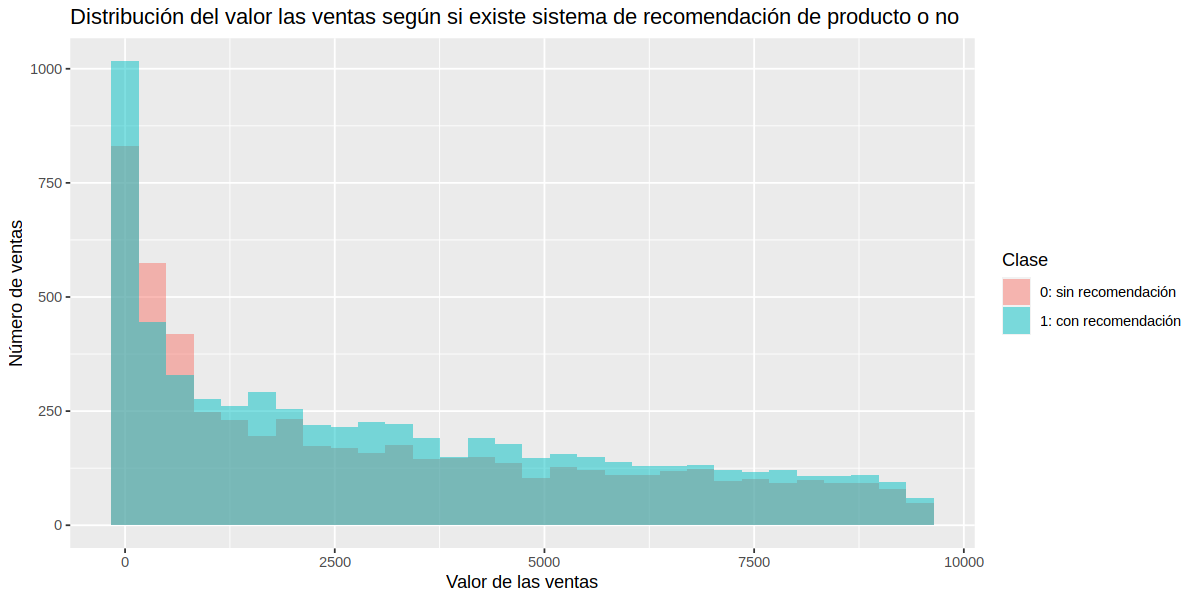

In [256]:
# tamaño plot
options(repr.plot.width = 10, repr.plot.height = 5)
# histograma
hist_p <- ggplot(sales_test_df, aes(x = Order.Value, fill = Group)) +
            geom_histogram(bins = 30, alpha = 0.5, position = "identity") +
            scale_fill_discrete(labels = c("0: sin recomendación ", "1: con recomendación"), name="Clase")+
            xlab('Valor de las ventas') +
            ylab('Número de ventas') +
            ggtitle("Distribución del valor las ventas según si existe sistema de recomendación de producto o no")
# ggplotly(hist_p)
hist_p

- En este histograma que representa la distribución del valor de las ventas según si tienen sistema de recomendación de producto o no, se observa una distribución sesgada a la derecha o asimetría positiva (Moda < Mediana < Media). 
- Tanto los datos de ventas con sistema de recomendación como los datos de ventas sin sistema de recomendación están sesgados a la derecha.
- Por tanto, el valor de las ventas no siguen una distribución normal, ya que la mayoría de los datos caen a la izquierda de la media. 
- Podemos observar que el número de ventas disminuye a medida que aumenta su valor. 
- Tanto las ventas con sistema de recomendación de producto como las que no tienen sistema de recomendación de producto comparten estas características anteriormente mencionadas. Por tanto, tanto si existe o no un sistema de recomendación de producto, el valor de las ventas siguen las misma distribución.

#### Boxplot

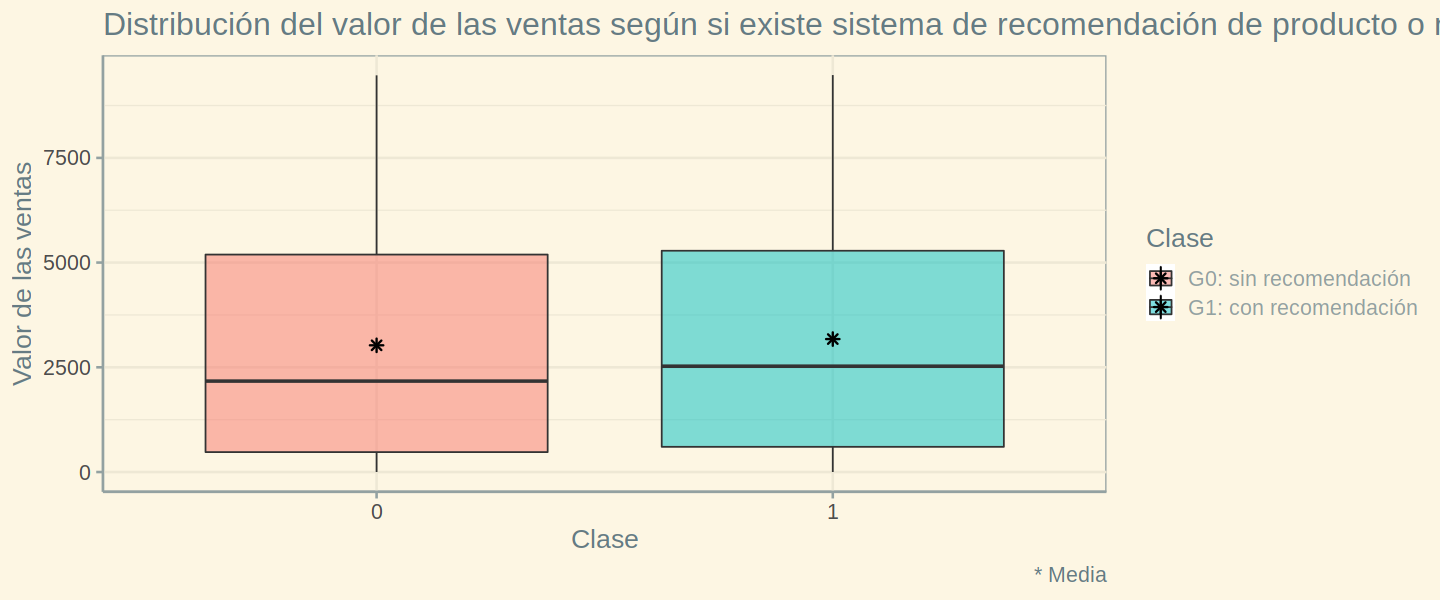

In [255]:
# oldw <- getOption("warn")
# options(warn = -1)


# tamaño plot
options(repr.plot.width = 12, repr.plot.height = 5)
# boxplot
ggplot(sales_test_df, 
       aes(x = Group,
           y = Order.Value,
           fill = Group)) + # fill or color
  geom_boxplot(alpha = 0.5, position='identity', outlier.color=NA) +
  scale_fill_discrete(labels = c("G0: sin recomendación ", "G1: con recomendación"), name="Clase") +
  # geom_jitter(size = 0, width = 0.3) +
  stat_summary(fun = "mean", color = "black", shape = 8) +
  ggthemes::theme_solarized(base_size = 16) +
  # scale_color_manual(values =
  #       c("darkgreen", "darkblue"),
  #       guide = NULL) +
  labs(title = "Distribución del valor de las ventas según si existe sistema de recomendación de producto o no",
       x = "Clase",
       y = "Valor de las ventas",
       caption = "* Media") 

# options(warn = oldw)


En este boxplot, que representa la distribución del valor de las ventas según si tienen sistema de recomendación de producto o no, podemos observar varias cosas. 
- El IQR es muy parecido en los dos grupos. En el grupo con sistema de recomendación de producto, la mayoría de las ventas se sitúan con un valor de entre 601.33 (Q1) y 5283.38 (Q3) con una mediana de 2526.08 (Q2) y un valor medio de 3173.84. En el grupo sin sistema de recomendación de producto, la mayoría de las ventas se sitúan con un valor de entre 475.2 (Q1) y 5191.9 (Q3) con una mediana de 2170.60 (Q2) y un valor medio de 3024.79. 
- No observamos outilers.
- Podemos observar que en ambos boxplots se presenta una asimetría hacia la derecha (o positiva), ya que el Q2 o mediana se sitúa más en la parte baja del boxplot y la media es más grande que la mediana. Podemos observar visualmente que, en el grupo con sistema de recomendación de producto, tanto el valor medio como mediano de las ventas son más grandes que las del grupo sin sistema de recomendación.  



Con lo observado hasta ahora, **parece** ser que implementar un sistema de recomendación de producto tiene un efecto positivo en la empresa, ya que el grupo con sistema de recomendación de producto tiene un valor medio de ventas más alto. No obstante, esto no lo podremos afirmar hasta realizar el test de hipótesis. 


#### Resumen estadístico por grupos

In [182]:
# summary statistics por grupos:
dataSummary <- sales_test_df%>%
    group_by(Group) %>%
      summarise(
        count = n(),
        mean = mean(Order.Value, na.rm = TRUE),
        median = median(Order.Value, na.rm = TRUE),
        mode = mlv(Order.Value, method='mfv'),     
        IQR = IQR(Order.Value, na.rm = TRUE)
      )
dataSummary

Group count mean     median  mode IQR     
1 0     5502  3024.787 2170.60 15   4716.300
2 1     6284  3173.837 2526.08 15   4681.682

- Moda < Mediana < Media: podemos observar como se cumplen, en los dos grupos, la característica de una distribución sesgada a la derecha o asimetría positiva.

In [152]:
# subset para cada clase o grupo
sales_test_no_recom <- sales_test_df[sales_test_df$Group==0, ]
sales_test_recom <- sales_test_df[sales_test_df$Group==1, ]

In [122]:
# sd para cada clase
cat("SD de la clase 0 (sin recomendación): ", sd(sales_test_no_recom$Order.Value) ,
    "\nSD de la clase 1 (con recomendación): ",  sd(sales_test_recom$Order.Value))

SD de la clase 0 (sin recomendación):  2817.731 
SD de la clase 1 (con recomendación):  2795.303

In [87]:
# varianza para cada clase
cat("Varianza de la clase 0 (sin recomendación): " ,var(sales_test_no_recom$Order.Value) ,
    "\nVarianza de la clase 1 (con recomendación): ",  var(sales_test_recom$Order.Value))

Varianza de la clase 0 (sin recomendación):  7939606 
Varianza de la clase 1 (con recomendación):  7813720

In [90]:
# diferencia de las sd de cada clase
sd(sales_test_no_recom$Order.Value) - sd(sales_test_recom$Order.Value)

[1] 22.42753

La variación del valor de las ventas con sistema de recomendación es de 7813720, mientras que la variación del valor de las ventas sin el sistema de recomendación es de 7939606. 

Por tanto, al implementar el sistema de recomendación de producto, el valor de las ventas tiene un 1.59% menos de variación.

### Tests de Normalidad

Aunque mediante el histograma y los boxlots hemos visto que el valor de las ventas no sigue una distribución normal, sino que presenta una asimetría positiva, lo comprobamos mediante test de normalidad. 

In [78]:
# Test de Normalidad de Anderson Darling
ad.test(sales_test_df$Order.Value)


	Anderson-Darling normality test

data:  sales_test_df$Order.Value
A = 388.17, p-value < 2.2e-16


Se utiliza el test de normalidad de Anderson-Darling ya que nuestra muestra tiene un tamaño de 11786 y el Shapiro-Wilk test solo se puede aplicar en muestras de tamaño mínimo 3 y tamaño máximo 5000. 
1. Hipótesis nula (H0): los datos siguen una distribución normal. 
 
2. Hipótesis alternativa (H1): los datos no siguen una distribución normal. 

- Observamos que el p-value ≤ 0.05. 
- El test de normalidad de Anderson Darling rechaza la hipótesis de normalidad cuando el p-value ≤ 0.05.  
- Fallar la prueba de normalidad permite afirmar con un 95% de confianza que los datos no se ajustan a la distribución normal.

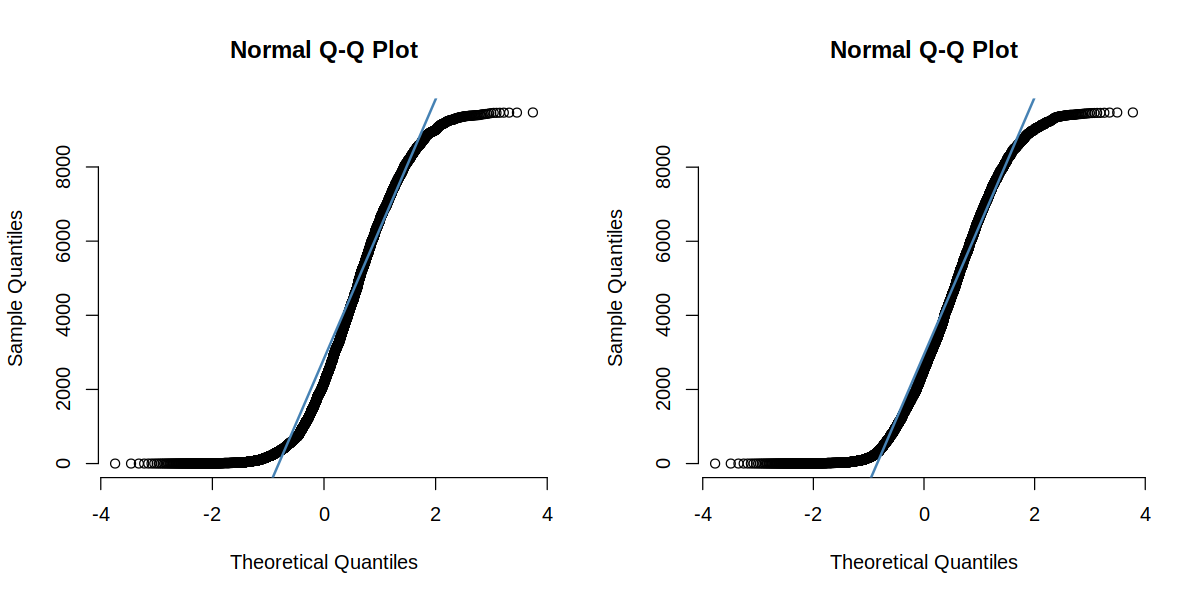

In [129]:
# tamaño plot
options(repr.plot.width = 10, repr.plot.height = 5)

#---Q-Q Plot---
par(mfrow=c(1,2))
# sin recomendación (clase 0)
qqnorm(sales_test_no_recom$Order.Value, pch = 1, frame = FALSE)
qqline(sales_test_no_recom$Order.Value, col = "steelblue", lwd = 2)
# con recomendación (clase 1)
qqnorm(sales_test_recom$Order.Value, pch = 1, frame = FALSE)
qqline(sales_test_recom$Order.Value, col = "steelblue", lwd = 2)

- El gráfico Q-Q presenta los cuantiles de dos distribuciones entre sí; en este caso, presentaremos los cuantiles de los datos de ventas (a la izquierda sin sistema de recomendación y a la derecha con sistema de recomendación) a partir de los cuantiles de una distribución normal. 
- Podemos observar que los datapoints en los dos gráficos divergen sustancialmente de la línea, reflejando el hecho de que no están distribuidos normalmente.

### Prueba de Hipótesis


  1. Hipótesis nula:
     + $H_{0}: µ_{Clase 0} - µ_{Clase 1} = 0$ 
         - El sistema de recomendación de productos no tiene ningún efecto sobre el valor de las ventas
         - No hay diferencia entre las dos medias de los dos grupos
 
  2. Hipótesis alternativa: 
        + $H_{1}: µ_{Clase 0} - µ_{Clase 1} {\ne} 0$ 
            - El sistema de recomendación de productos tiene un efecto significativo positivo sobre el valor de las ventas
            - Sí hay diferencia entre las medias de los dos grupos

#### Tests estadísticos

- Como hemos observado que el valor de las ventas no está distribuido normalmente, deberíamos usar test alternativos (no paramétricos).
- Usamos el Wilcoxon's rank sum test (Mann-Whitney U test) ya que es el equivalente no paramétrico al t-test para dos muestras independientes, con un nivel de significancia del 5%. 

In [280]:
# Wilcoxon's rank sum test (Mann-Whitney U test)
res <- wilcox.test(Order.Value ~ Group, data = sales_test_df,
            alternative = "less", # one-tailed
            paired = FALSE, # unpaired
            conf.level = 0.95 # confidence level of the interval
           )
res


	Wilcoxon rank sum test with continuity correction

data:  Order.Value by Group
W = 16732250, p-value = 0.001298
alternative hypothesis: true location shift is less than 0


- Observamos que el p-value = 0.0013 (p-value ≤ 0.05). 
- La probabilidad de que la hipótesis nula sea cierta es de un 0.13%, es decir, tenemos un 0.13% de probabilidades de cometer un error. 
- Por tanto, podemos rechazar la hipótesis nula con un 99.87% de confianza y afirmar que existe una diferencia estadísticamente significativa entre el valor de las ventas con sistema de recomendación y el valor de las ventas sin sistema de recomendación: el sistema de recomendación de producto tiene un efecto significativo positivo sobre el valor las ventas (aumenta el valor medio de las ventas).

No obstante, **si los datos siguieran una distribución normal**, al no tener conocimiento previo (no tenemos ningún estudio en el pasado que queramos validar), tendríamos que usar el t test.  

A continuación se muestra como se realizaría el test de hipótesis si los datos siguieran una distribución normal.

Dado que el propósito de la prueba es verificar si hay un efecto positivo en el valor de las ventas debido a la implementación del sistema de recomendación, utilizamos prueba T de una cola.

- t-test de dos muestras independientes de una cola para las medias.
    - 2 muestras independientes
    - Unpaired: tenemos un grupo con sistema de recomendación (grupo 1) y otro grupo sin sistema de recomendación (grupo 0)
    - one-sided: 
        - queremos validar la hipótesis que la clase 1 tiene un valor de venta medio más alto
    - Varianza de cada grupo desconocida => Welch two sample t-test
        - No asumir que existe la misma variación en los dos grupos es más conservador. 
        - Si nuestro datos pasan este t-test más conservador, podemos decir que nuestros datos son muy sólidos.

In [279]:
# unpaired two-samples t-test (one-tailed)
t.test(sales_test_no_recom$Order.Value, sales_test_recom$Order.Value,
       paired = F, # unpaired
       conf.level = 0.95, 
       alternative = "less", # one-tailed t-test
       var.equal = FALSE # Welch test
      )


	Welch Two Sample t-test

data:  sales_test_no_recom$Order.Value and sales_test_recom$Order.Value
t = -2.8757, df = 11554, p-value = 0.002019
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
      -Inf -63.78874
sample estimates:
mean of x mean of y 
 3024.787  3173.837 


- Observamos que el p-value = 0.002 (p-value ≤ 0.05). 
- La probabilidad de que la hipótesis nula sea cierta es de un 0.2%, es decir, tenemos un 0.2% de probabilidades de cometer un error. 
- Por tanto, como en el caso del test no paramétrico anterior, podemos rechazar la hipótesis nula con un 99.8% de confianza y afirmar que existe una diferencia estadísticamente significativa entre el valor de las ventas con sistema de recomendación y el valor de las ventas sin sistema de recomendación: el sistema de recomendación de producto tiene un efecto significativo positivo sobre el valor las ventas (aumenta el valor medio de las ventas).
- El intervalo de confianza del 95% nos indica que podemos estar seguros al 95% que el rango en el que se encuentra el verdadero valor medio de la población (la diferencia media en la población) es [-Infinito to -63.78874].


##### Incremento neto del valor de las ventas mediante el sistema de recomendación

In [219]:
# Calculamos el incremento del valor de las ventas mediante el sistema de recomendación
val_medio_ventas_sist_recom = 3173.837
val_medio_ventas_no_sist_recom = 3024.787

incremento_neto_ventas = val_medio_ventas_sist_recom - val_medio_ventas_no_sist_recom
incremento_neto_ventas

[1] 149.05

In [203]:
# función para calcular el porcentaje de diferencia
porcen_dif <- function(val_antiguo, val_nuevo) {
    result <- abs(val_nuevo - val_antiguo) / abs(val_antiguo) * 100
    return(result)
    }

In [205]:
# Porcentaje de diferencia
porcen_dif(3024.787, 3173.837)

[1] 4.92762

- Podemos ver que el valor medio de las ventas con sistema de recomendación es más elevado que el de las ventas sin sistema de recomendación (3173.837 y 3024.787, respectivamente).
- Entonces, con la implementación del sistema de recomendación, de media se factura 149.05 unidades monetarias más por acción de venta. Por tanto, de media se factura un 5% más (se incrementa el valor medio de venta en un 5%). 

### Conclusión: ¿Se podría recomendar el uso de este sistema de recomendación?

Basándonos en los datos proporcionados, hemos visto que implementar el sistema de recomendación de productos durante 3 meses aumenta de manera significativa el valor medio de las ventas.

Por lo tanto, la empresa puede suponer que implementar un sistema de recomendación de productos aumentará el valor de las ventas de forma estadísticamente significativa. 

La probabilidad de que el valor de las ventas aumentase igual o más sin el sistema de recomendación de productos que con el sistema de recomendación de productos es inferior al 5%. 

Sin embargo, es importante tener en cuenta que el hecho de que un efecto sea estadísticamente significativo no significa que el efecto sea relevante. 

Una prueba durante 3 meses no recoge una posible estacionalidad de la demanda de la empresa cliente. Es decir, la promoción se puede haber hecho cuando toca, pero también cuando no toca. Una determinada época del año no refleja la totalidad de este. Además, en 3 meses no es posible saber si la venta está consolidada. 
También es importante determinar si la inversión de implementar el sistema de recomendación de productos compensa el 5% de incremento de facturación, así como determinar si es sostenible en el tiempo. ¿Es para siempre o solo durante una determinada época?

En conclusión, implementar el sistema de recomendación de productos genera de media más valor de ventas (un 5% más) y en principio esto es un buen indicador de que la estrategia funciona, ya que un 5% más de facturación es interesante siempre y cuando sea rentable en términos de margen. No obstante, sería necesario hacer un análisis financiero para saber si sale a cuenta y poder tomar la decisión final. 
